# Sprint11課題 深層学習スクラッチディープニューラルネットワーク

## 【問題1】全結合層のクラス化
コーディング

全結合層のクラスの雛形を載せました。コンストラクタで重みやバイアスの初期化をして、あとはフォワードとバックワードのメソッドを用意します。

重みW、バイアスB、およびフォワード時の入力Xをインスタンス変数として保持しておくことで、煩雑な入出力は不要になります。

なお、インスタンスも引数として渡すことができます。そのため、初期化方法のインスタンスinitializerをコンストラクタで受け取れば、それにより初期化が行われます。渡すインスタンスを変えれば、初期化方法が変えられます。

また、引数として自身のインスタンスselfを渡すこともできます。これを利用してself = self.optimizer.update(self)という風に層の重みの更新が可能です。更新に必要な値は複数ありますが、全て全結合層が持つインスタンス変数にすることができます。

初期化方法と最適化手法のクラスについては後述します。

pyファイルは[こちら](https://github.com/ohmorimori/diveintocode-ml/blob/master/diveintocode-term2/ml-scratch/model/layer.py)

## 【問題2】初期化方法のクラス化
前述のように、全結合層のコンストラクタに初期化方法のインスタンスを渡せるようにします。雛形に必要なコードを書き加えていってください。標準偏差の値（sigma）はコンストラクタで受け取るようにすることで、全結合層のクラス内にこの値（sigma）を渡さなくてすむようになります。

これまで扱ってきた初期化方法はSimpleInitializerクラスと名付けることにします。

pyファイルは[こちら](https://github.com/ohmorimori/diveintocode-ml/blob/master/diveintocode-term2/ml-scratch/model/initializer.py)

## 【問題3】最適化手法のクラス化
最適化手法に関しても初期化方法同様に全結合層にインスタンスとして渡します。バックワードのときにself = self.optimizer.update(self)のように更新できるようにします。こちらも雛形を用意しましたので、必要なコードを書き加えていってください。

これまで扱ってきた最適化手法はSGDクラス（Stochastic Gradient Descent、確率的勾配降下法）として作成します。

pyファイルは[こちら](https://github.com/ohmorimori/diveintocode-ml/blob/master/diveintocode-term2/ml-scratch/model/optimizer.py)

## 【問題4】活性化関数のクラス化
活性化関数もクラス化を行なってください。

上記サンプルコード3ではソフトマックス関数のバックプロパゲーションに交差エントロピー誤差の計算も含む実装を想定しています。

pyファイルは[こちら](https://github.com/ohmorimori/diveintocode-ml/blob/master/diveintocode-term2/ml-scratch/model/activator.py)

## 【問題5】ReLUクラスの作成
現在一般的に使われている活性化関数であるReLU（Rectified Linear Unit）をReLUクラスとして実装します。

ReLUは以下の数式です。

pyファイルは[こちら](https://github.com/ohmorimori/diveintocode-ml/blob/master/diveintocode-term2/ml-scratch/model/activator.py)

## 【問題6】重みの初期値
ここまでは重みやバイアスの初期値は単純にガウス分布で、標準偏差をハイパーパラメータとして扱ってきました。しかし、一般的に良い初期値の取り方が知られています。

シグモイド関数やハイパボリックタンジェント関数のときはXavierの初期値（またはGlorotの初期値）、ReLUのときはHeの初期値が使われます。

XavierInitializerクラスと、HeInitializerクラスを作成します。

それぞれの初期化方法における 
σ
 は次の式で求められます。

「Xavierの初期値」

pyファイルは[こちら](https://github.com/ohmorimori/diveintocode-ml/blob/master/diveintocode-term2/ml-scratch/model/initializer.py)

## 【問題7】最適化手法
コーディング

学習率は学習の良し悪しにとって重要なハイパーパラメータであり、これを学習過程で変化させていく方法が現在では一般的です。様々な手法が提案されていますが、今回はその中でも基本的な、AdaGradを実装します。

まず、これまで使ってきたSGDを確認します。

pyファイルは[こちら](https://github.com/ohmorimori/diveintocode-ml/blob/master/diveintocode-term2/ml-scratch/model/optimizer.py)

In [1]:
#データセットの用意
from keras.datasets import mnist
import numpy as np
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
#reshape
test = X_train[0]
print(test.shape)
test = test.reshape(-1, 1)
print(test.shape)

(28, 28)
(784, 1)


In [3]:
#reshape
X_train = X_train.reshape(-1, X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(-1, X_test.shape[1]*X_test.shape[2])

In [4]:
#前処理
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max())
print(X_train.min())

1.0
0.0


In [5]:
#split into train, val
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) 
print(X_val.shape) 

(48000, 784)
(12000, 784)


modelのインポート<br>
[pyファイル](https://github.com/ohmorimori/diveintocode-ml/blob/master/diveintocode-term2/ml-scratch/model/scratch_deep_nn_classifier.py)

In [7]:
#modelのインポート
import sys
model = "../../ml-scratch/model"
if model not in sys.path:
        sys.path.append(model)

from scratch_deep_nn_classifier import ScratchDeepNeuralNetrowkClassifier


In [13]:
snnc = ScratchDeepNeuralNetrowkClassifier(
        batch_size=20,
        lr=0.001,
        n_epochs=30
)

cost = snnc.fit(X_train, y_train, X_test, y_test)
pred = snnc.predict(X_test)

print(y_test)
print(pred)
print(y_test == pred)
print((y_test == pred).sum()/len(y_test))



epoch:  0
process time:  10.499972105026245 sec
epoch:  1
process time:  21.237000942230225 sec
epoch:  2
process time:  32.06384205818176 sec
epoch:  3
process time:  46.24880528450012 sec
epoch:  4
process time:  60.54175591468811 sec
epoch:  5
process time:  78.38211107254028 sec
epoch:  6
process time:  96.89339017868042 sec
epoch:  7
process time:  114.72902202606201 sec
epoch:  8
process time:  131.29367303848267 sec
epoch:  9
process time:  148.65427827835083 sec
epoch:  10
process time:  164.8840880393982 sec
epoch:  11
process time:  180.59114909172058 sec
epoch:  12
process time:  194.89581608772278 sec
epoch:  13
process time:  209.56415104866028 sec
epoch:  14
process time:  223.66424417495728 sec
epoch:  15
process time:  238.7555022239685 sec
epoch:  16
process time:  253.79947233200073 sec
epoch:  17
process time:  268.2677938938141 sec
epoch:  18
process time:  282.6084771156311 sec
epoch:  19
process time:  296.4353621006012 sec
epoch:  20
process time:  310.3202812671

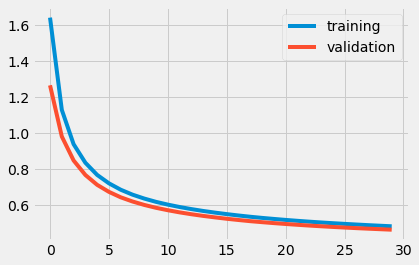

In [15]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.plot(np.arange(len(cost["training"])), cost["training"], label="training")
plt.plot(np.arange(len(cost["validation"])), cost["validation"], label="validation")
plt.legend();